In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from core.config import *

from core.datasets import VOC2012SegDataset, get_image
from core.viz import write_html_multi_row_image_caption, compute_maps_with_captions
from core.data_utils import flatten_list_to_depth
from models.vle import VLE_REGISTRY, MapComputeMode

from pathlib import Path

import torchvision.transforms.v2.functional as TF
from torchvision.transforms.v2.functional import to_pil_image

In [3]:
config = setup_config(BASE_CONFIG, Path('/home/olivieri/exp/src/train/vle/2-GT_PR_vs_dT/viz_config.yml'))
vle_config = config['vle']

In [4]:
vle = VLE_REGISTRY.get(
    name='flair',
    version='flair-cc3m-recap.pt',
    pretrained_weights_root_path=vle_config['pretrained_weights_root_path'],
    new_layers=[],
    device=config['device']
)

`img_idxs` should be array([30,  0, 22, 31, 18, 28, 10, 70,  4, 12]).

In [28]:
map_compute_mode = MapComputeMode.MAX_TEXT_TOKEN_SIM
map_resize_mode = TF.InterpolationMode.NEAREST
mask_color = 'L'
mask_alpha = 0.55 # the greater, the less scene is visible
map_alpha = 1.0
viz_image_size = 720
normalize = True

In [29]:
imgs_paths = [
    Path('/home/olivieri/exp/resources/frappuccino.png'),
    Path('/home/olivieri/exp/resources/frappuccino.png'),
]

In [30]:
imgs = torch.stack([get_image(img_path, config['device'], vle_config['image_size']) for img_path in imgs_paths])
print(imgs.shape)

torch.Size([2, 3, 224, 224])


In [31]:
captions = [
    'The background, though blurred, reveals a parking lot filled with cars',
    'Despite the background, the frappuccino remains the star of the image'
]

In [32]:
from PIL.Image import Image


out: list[tuple[Image, str]] = compute_maps_with_captions(
    vle,
    imgs,
    captions,
    map_compute_mode,
    map_alpha,
    viz_image_size,
    map_resize_mode,
    normalize,
    True,
    font_size=10
)

In [33]:
out

[(<PIL.Image.Image image mode=RGB size=720x720>,
  'SIM = 0.39',
  'MIN VALUE = 0.05, MAX VALUE = 0.37',
  'The background, though blurred, reveals a parking lot filled with cars',
  '---'),
 (<PIL.Image.Image image mode=RGB size=720x720>,
  'SIM = 0.50',
  'MIN VALUE = 0.02, MAX VALUE = 0.49',
  'Despite the background, the frappuccino remains the star of the image',
  '---')]

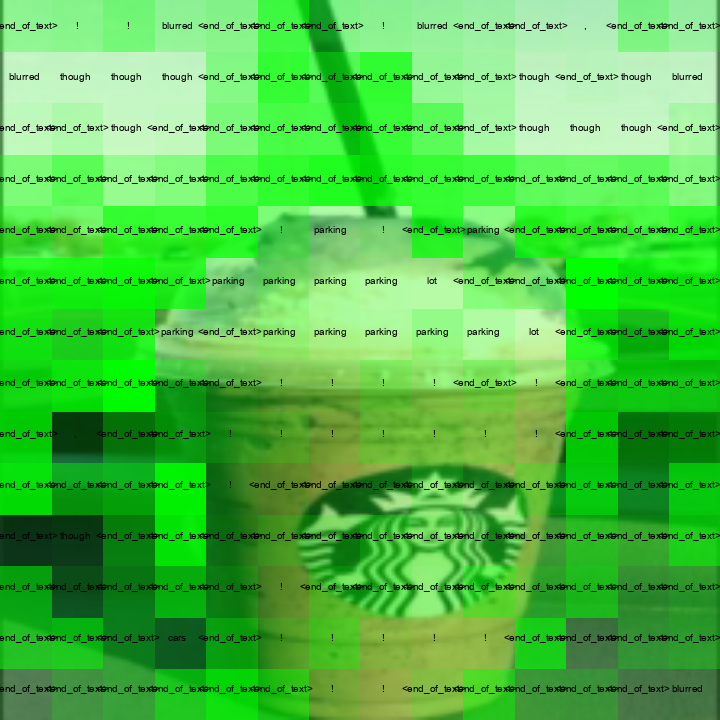

In [35]:
out[0][0]